In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
freq = 'H'

min         max       mean     jitter  n_threshold  \
day    hour minute                                                             
Monday 13   0       17.859131  377.223283  34.207015  30.104617          212   
       14   0       18.299137  376.924543  35.189430  31.151698          850   
       15   0       19.764417  370.511325  35.338211  30.382198          833   
       16   0       19.752341  359.048449  35.652162  29.493328          847   
       17   0       19.435043  352.533480  35.457533  28.899667          199   

                        n  
day    hour minute         
Monday 13   0        4800  
       14   0       19400  
       15   0       19400  
       16   0       19400  
       17   0        4600

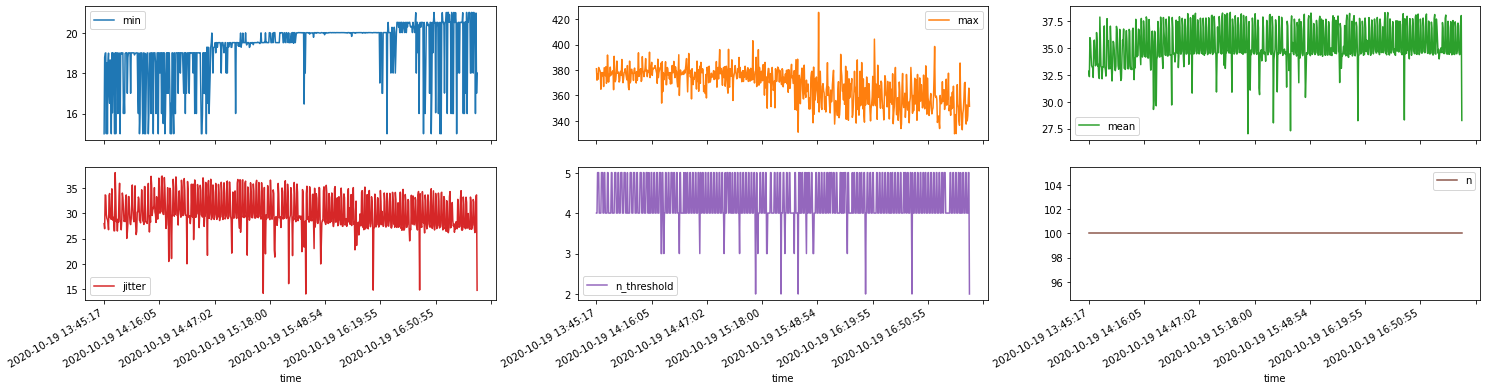

In [6]:
ping_data = pd.read_csv(
    "league_ping_data.csv",
    header=None,
    names=["time", "min", "max", "mean", "jitter", "n_threshold", "n"],
    index_col="time",
)
ping_data.plot(subplots=True, figsize=(25, 6), layout=(2, 3))
ping_data.groupby(
    by=[
        pd.DatetimeIndex(ping_data.index).floor(freq).day_name().rename("day"),
        pd.DatetimeIndex(ping_data.index).floor(freq).hour.rename("hour"),
        pd.DatetimeIndex(ping_data.index).floor(freq).minute.rename("minute"),
    ]
).agg(
    {
        "min": "mean",
        "max": "mean",
        "mean": "mean",
        "jitter": "mean",
        "n_threshold": "sum",
        "n": "sum",
    }
)